In [1]:
import json
import networkx as nx
import numpy as np
import math

In [2]:
class indoorGraph:
    def createGraph(path):
        G = nx.Graph()
        with open(path) as f:
            graph = json.load(f, parse_int=str)
            for node in graph['node']:
                G.add_node(node['Id'], 
                    title = node['Title'], 
                    position = (node['X'], node['Y'], node['Z']))
            for edge in graph['edge']:
                x1,y1,z1 = map(int,G.nodes[edge['node'][0]]['position'])
                x2,y2,z2 = map(int,G.nodes[edge['node'][1]]['position'])
                G.add_edge(edge['node'][0], edge['node'][1], weight = int(abs((x1-x2) +(y1-y2) +(z1-z2))))
        return G
    def computeShortestPath(G, nodes):
        path = nx.bidirectional_dijkstra(G, nodes[0], nodes[1],weight="weight")
        return path

    def showLayout(G):
        pos = {}
        for node in G.nodes(data = True):
            pos[node[0]] = [int(p) for p in node[1]['position'][0:2]]
        nx.draw(G, pos = pos)

    def getNodeId(G, nodeTitle):
        for node in G.nodes(data = True):
            if(node[1]['title'] == nodeTitle):
                return node[0]
        return False


In [3]:
G = nx.Graph()
G.add_edge(1, 2, weight=3)
G.add_edge(2, 3, weight=7)
print(nx.bidirectional_dijkstra(G, 1,3,weight="weight"))

(10, [1, 2, 3])


[('1', '8'), ('2', '5'), ('3', '6'), ('4', '5'), ('5', '6'), ('5', '16'), ('6', '7'), ('6', '12'), ('7', '8'), ('7', '13'), ('8', '9'), ('9', '10'), ('9', '14'), ('10', '11'), ('10', '24'), ('15', '16'), ('16', '20'), ('17', '21'), ('18', '23'), ('19', '20'), ('20', '21'), ('20', '26'), ('21', '22'), ('22', '23'), ('22', '27'), ('23', '24'), ('24', '25'), ('24', '28')]
(26, ['1', '8', '9', '10', '24', '23', '22', '21', '17'])


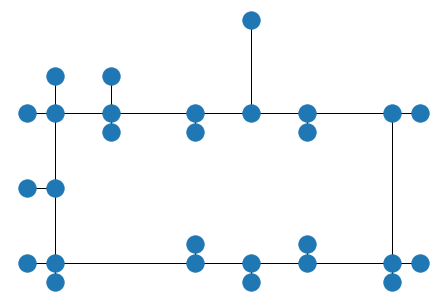

In [4]:
G = indoorGraph.createGraph('./Jsons/test1.json')
# print(indoorGraph.getNodeId(G, 'Node1'))
print(G.edges)
indoorGraph.showLayout(G)
path = indoorGraph.computeShortestPath(G, ('1', '17'))
print(path)